In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

import matplotlib.pyplot as pl

df = pd.read_csv('./data/DataRisaralda_v2Numeric_Complete_utf-8.csv', header=0, sep=',', index_col=0, parse_dates=False, encoding='utf-8')
print df.shape

(767, 108)


In [49]:
print df.shape
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

print df_train.shape
print df_test.shape



cols = ['SICA 1',
        'prec1','prec2','prec3','prec4','prec5','prec6','prec7','prec8','prec9','prec10',
        'tmin1','tmin2','tmin3','tmin4','tmin5','tmin6','tmin7','tmin8','tmin9','tmin10',
        'tmax1','tmax2','tmax3','tmax4','tmax5','tmax6','tmax7','tmax8','tmax9','tmax10',
        'tmean1','tmean2','tmean3','tmean4','tmean5','tmean6','tmean7','tmean8','tmean9','tmean10',
        'dtr1','dtr2','dtr3','dtr4','dtr5','dtr6','dtr7','dtr8','dtr9','dtr10',
        'PrecTotalAvg','TminTotalAvg','TmaxTotalAvg','TmeanTotalAvg','DtrTotalAvg',
        'PrecTotal','TminTotal','TmaxTotal','TmeanTotal','DtrTotal',
        'year','ASNM','LUMINOSID',
        "pH_avg","org_avg",
        "franco_L1","arcilloso_L1","limoso_L1","arenoso_L1","cascajoso_L1",
        "franco_L2","arcilloso_L2","limoso_L2","arenoso_L2","cascajoso_L2",
        "franco_L3","arcilloso_L3","limoso_L3","arenoso_L3","cascajoso_L3",
        'Negros y vinagres','Broca','Broca de punto','Veteado',
        'Inmaduro','Flojo','Sobresecado','Arrugado','Aplastado','Cristalizado','Reposado','Granizo',
        'Partido','Defectos totales','Humedad (%)','Merma (%)','Aroma-Fragancia',
        'Acidez','Cuerpo','Sabor','Sabor residual','Dulzor','Uniformidad','Balance','Taza limpia','Puntaje catador','Puntaje Total']

defectos = ['Negros y vinagres','Broca','Broca de punto','Veteado',
        'Inmaduro','Flojo','Sobresecado','Arrugado','Aplastado','Cristalizado','Reposado','Granizo',
        'Partido','Defectos totales']

print("\n====================================================================")
print("Attention à bien maintenir  les indexes lors de l'ajout de données !")
print("====================================================================\n")

inputData = cols[:cols.index("cascajoso_L3")+1]
outputData = cols[cols.index("cascajoso_L3")+1:]

print inputData[-1]

print outputData[0]

df = df[cols]

(767, 108)
(644, 107)
(123, 107)

Attention à bien maintenir  les indexes lors de l'ajout de données !

cascajoso_L3
Negros y vinagres


# Premier test de Random Forest 

Prédiction du nombre total de points

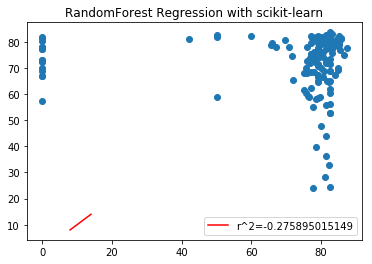

In [33]:
cols = inputData
rf = RandomForestRegressor(n_estimators=20)
rf.fit(train[cols], train['Puntaje Total'])

r2 = r2_score(test['Puntaje Total'], rf.predict(test[cols]))
mse = np.mean((test['Puntaje Total'] - rf.predict(test[cols]))**2)


pl.scatter(test['Puntaje Total'], rf.predict(test[cols]))
pl.plot(np.arange(8, 15), np.arange(8, 15), label="r^2=" + str(r2), c="r")
pl.legend(loc="lower right")
pl.title("RandomForest Regression with scikit-learn \n ")
pl.show()

Test de prédiction des défauts

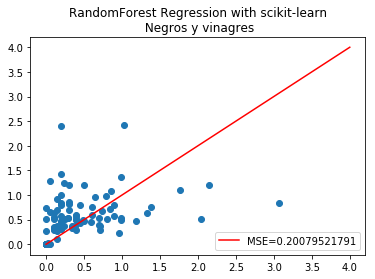

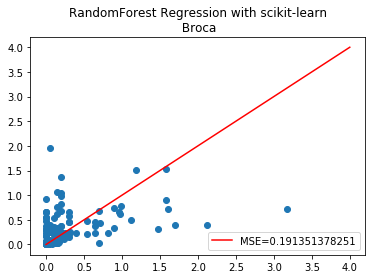

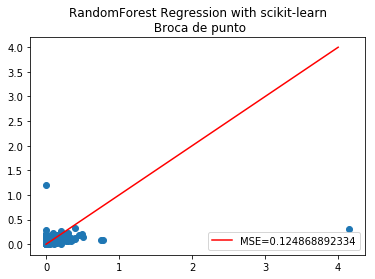

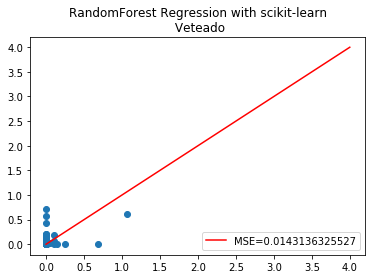

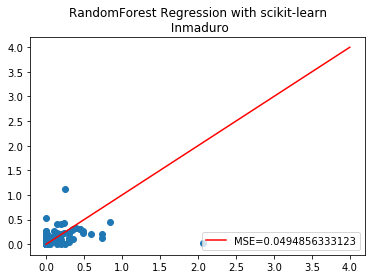

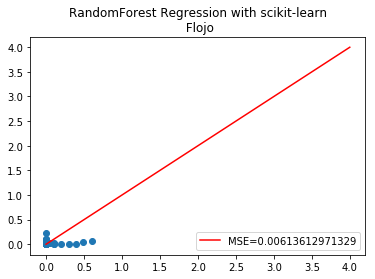

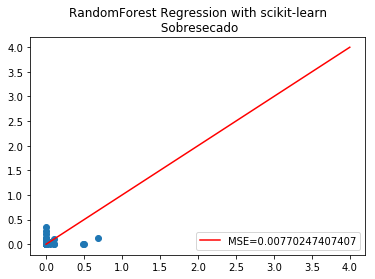

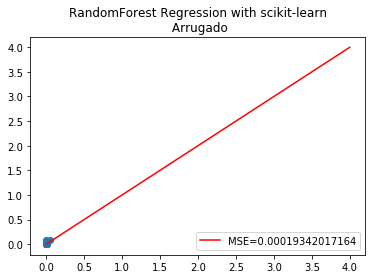

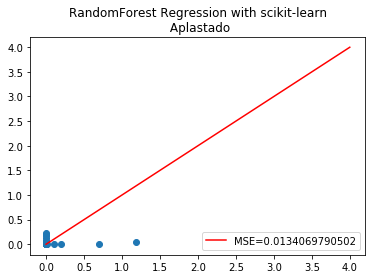

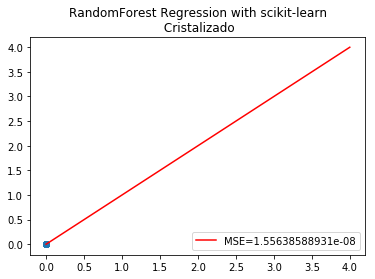

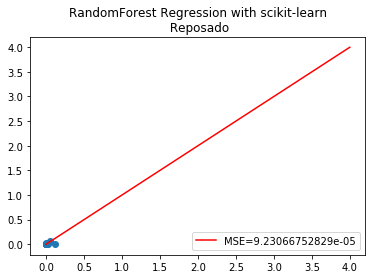

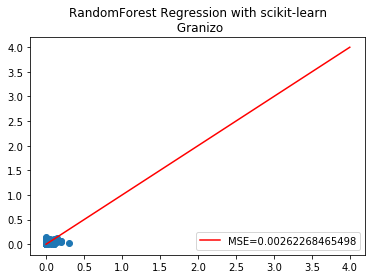

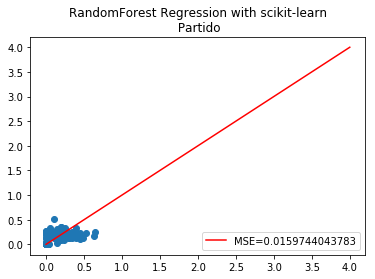

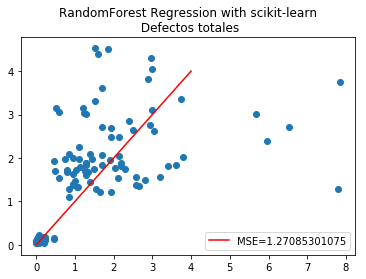

In [40]:
for defekt in defectos:
    cols = inputData
    rf = RandomForestRegressor(n_estimators=30)
    rf.fit(train[cols], train[defekt])

    r2 = r2_score(test[defekt], rf.predict(test[cols]))
    
    mse = np.mean((test[defekt] - rf.predict(test[cols]))**2)


    pl.scatter(test[defekt], rf.predict(test[cols]))
    pl.plot(np.arange(0, 5), np.arange(0, 5), label="MSE=" + str(mse), c="r")
    pl.legend(loc="lower right")
    pl.title("RandomForest Regression with scikit-learn\n " + defekt)
    pl.show()